In [68]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [69]:
import numpy as np 
loci=["BCL11A","HBA2","HBE1","LMO2","MYC","RBM38"]
source_dir_fc_regression="regression.1kb.FClayer.embeddings.gc.corrected"
source_dir_fc_classification="classification.1kb.FClayer.embeddings.gc.corrected"
source_dir_conv1_regression="regression.1kb.Conv1layer.embeddings.gc.corrected"
source_dir_conv1_classification="classifiation.1kb.Conv1layer.embeddings.gc.corrected"


In [70]:
##FC regression 
locus="BCL11A"
fname='/'.join([source_dir_fc_regression, locus+"_FC_layer_NN_embeddings.regression.gc.npz"])
data_pickle=np.load(fname,allow_pickle=True)
bed_entries=data_pickle['bed_entries']
embeddings=data_pickle['embeddings']

In [71]:
embeddings.shape

(8001, 1000)

In [72]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 200) 
  
pca_res = pca.fit_transform(embeddings)   
explained_variance = pca.explained_variance_ratio_ 

In [73]:
pca_res.shape

(8001, 200)

In [74]:
explained_variance[0:10]
np.cumsum(explained_variance)

array([0.64338154, 0.13243379, 0.10112587, 0.04295038, 0.02046244,
       0.01040109, 0.00634244, 0.00484455, 0.00457301, 0.00386522],
      dtype=float32)

array([0.64338154, 0.7758153 , 0.8769412 , 0.9198916 , 0.94035405,
       0.9507551 , 0.95709753, 0.9619421 , 0.96651506, 0.9703803 ,
       0.9732086 , 0.9756808 , 0.97752756, 0.97918916, 0.98056877,
       0.9818093 , 0.9827972 , 0.9837271 , 0.98456705, 0.9852382 ,
       0.9858842 , 0.9865127 , 0.9870931 , 0.98758936, 0.9880429 ,
       0.9884575 , 0.9888572 , 0.9892472 , 0.98961836, 0.9899785 ,
       0.99032295, 0.990633  , 0.9909134 , 0.99118817, 0.9914539 ,
       0.9916902 , 0.9919216 , 0.992143  , 0.99235886, 0.9925592 ,
       0.9927554 , 0.99294704, 0.99311745, 0.99328476, 0.9934491 ,
       0.9935996 , 0.9937451 , 0.9938869 , 0.99402326, 0.9941539 ,
       0.99428135, 0.9944007 , 0.994514  , 0.99462396, 0.99472946,
       0.9948337 , 0.9949351 , 0.99503565, 0.9951326 , 0.99522704,
       0.9953152 , 0.9954022 , 0.99548644, 0.9955688 , 0.995649  ,
       0.9957264 , 0.99580145, 0.9958727 , 0.9959417 , 0.9960098 ,
       0.9960759 , 0.9961397 , 0.99620104, 0.99626124, 0.99632

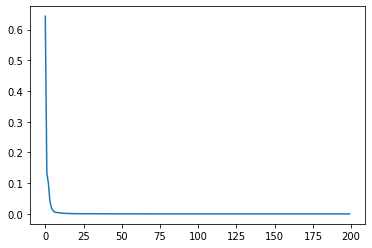

In [75]:
from matplotlib import pyplot as plt
plt.plot(explained_variance)

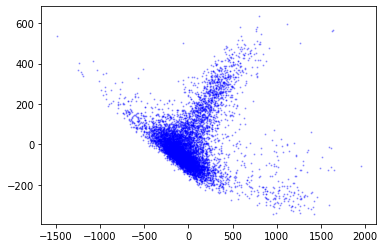

In [76]:
plt.plot(pca_res[:,0],pca_res[:,1],'bo',markersize=1,alpha=0.3)


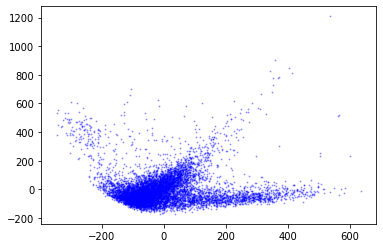

In [77]:
plt.plot(pca_res[:,1],pca_res[:,2],'bo',markersize=1,alpha=0.3)


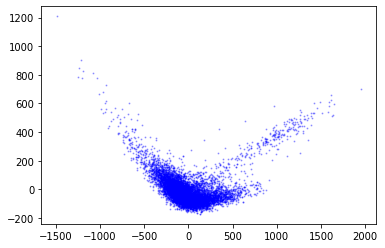

In [78]:
plt.plot(pca_res[:,0],pca_res[:,2],'bo',markersize=1,alpha=0.3)


In [80]:
locus="BCL11A"
gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
#add gc column to embedding 
pca_with_gc=np.concatenate((pca_res[:,0:10],gc_vals),axis=1)
print(pca_with_gc.shape)
corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(pca_with_gc)
df_fc=pd.DataFrame.from_dict({'corrected_fc_1':corrected_fc_embeddings_2d[:,0],
                              'corrected_fc_2':corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
print((ggplot(df_fc,aes(x='corrected_fc_1', y='corrected_fc_2',color='gc'))+
       geom_point(size=1,alpha=0.3)+
       ggtitle(locus+", Regression, FC")))


(8001, 11)


/users/annashch/miniconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../users/annashch/miniconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


NameError: name 'pd' is not defined

In [82]:
corrected_fc_embeddings_2d.shape

(8001, 2)

In [85]:
import pandas as pd
from plotnine import * 


/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

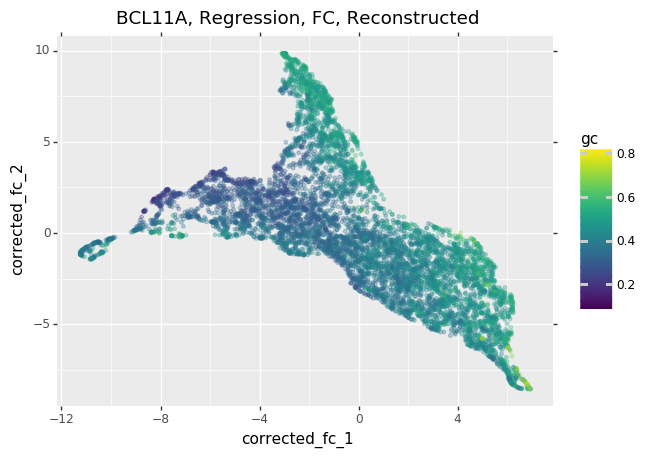

<ggplot: (8766408111210)>


In [87]:
df_fc=pd.DataFrame.from_dict({'corrected_fc_1':corrected_fc_embeddings_2d[:,0],
                              'corrected_fc_2':corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
print((ggplot(df_fc,aes(x='corrected_fc_1', y='corrected_fc_2',color='gc'))+
       geom_point(size=1,alpha=0.3)+
       ggtitle(locus+", Regression, FC, Reconstructed")))


In [96]:
list(df_fc[df_fc['corrected_fc_1']>6].index)

[127,
 405,
 406,
 835,
 867,
 1247,
 1249,
 1318,
 1391,
 1600,
 1601,
 1680,
 1681,
 1974,
 1975,
 1976,
 1979,
 2152,
 2164,
 2165,
 2166,
 2239,
 2335,
 2338,
 2347,
 2412,
 2500,
 2705,
 2725,
 2829,
 2831,
 2845,
 2846,
 2918,
 2919,
 2928,
 2930,
 2973,
 2974,
 2976,
 2977,
 2978,
 2979,
 3028,
 3038,
 3049,
 3074,
 3149,
 3178,
 3185,
 3194,
 3196,
 3197,
 3212,
 3233,
 3252,
 3340,
 3341,
 3348,
 3416,
 3417,
 3424,
 3446,
 3519,
 3529,
 3543,
 3602,
 3603,
 3633,
 3700,
 3701,
 3723,
 3724,
 3763,
 3772,
 3774,
 3785,
 3812,
 3827,
 3834,
 3835,
 3837,
 3851,
 3852,
 3853,
 3907,
 3908,
 3909,
 3968,
 3987,
 3988,
 3989,
 4003,
 4004,
 4006,
 4007,
 4008,
 4015,
 4017,
 4030,
 4031,
 4046,
 4113,
 4114,
 4115,
 4125,
 4231,
 4233,
 4235,
 4244,
 4355,
 4356,
 4357,
 4398,
 4411,
 4484,
 4485,
 4496,
 4585,
 4617,
 4618,
 4619,
 4630,
 4657,
 4753,
 4762,
 4810,
 4811,
 4812,
 4973,
 5014,
 5015,
 5016,
 5020,
 5021,
 5058,
 5059,
 5060,
 5061,
 5090,
 5091,
 5096,
 5097,
 512